# NLP?
NLP or NAtural Language Processing is a part of AI which deals with the textual aspect of the data. We can perform different task using NLP some of the simplest being:

1. Classify the kind of text data. (Science,Sports etc)
2. Extract the summary from the text (useful in the key points for legal documents)
3. Make a Fill in the Blanks Model
4. ChatBots
5. Image Captioning

NLP has reached a point of complexity where the models are generating scripts for a play or generate a random story based on a random word.

# Problem?
We have to classify the given comments in 2 parts whether these are toxis or not by using the comments. 1 shows Toxic, 0 shows Not Toxic

# Solution?
## RNN (Recurrent Neural Networks):
I can not draw the figure for weights,biases and all the other things that are very essential to have a deep understanding of RNN so Please check out [this insightful video](https://www.youtube.com/watch?v=2E65LDnM2cA&list=PL1F3ABbhcqa3BBWo170U4Ev2wfsF7FN8l) on RNN by Andrew NG and a very [intutive video by MIT](https://www.youtube.com/watch?v=SEnXr6v2ifU&t=1398s) before you start.

**<font color='teal'>RNN helps wherever we need context from the previous input such as:**</font>

1. Language to Language Translation (Many to Many Articture: Many inputs Many Outputs)
2. Sentimeny Analysis (Many to One Articture: Many inputs One Output)
3. Music, Story Generation (One to Many Articture: One input Many Outputs)

**<font color='red'>We're talking about the `Many to Many Architecture Below`</font>**

RNN are specialised version of Neural Networks which deals with the time aspect as well. For instance, given a sentence like `Because Eminem is the only Rapper to win an Oscar, best selling rapper of all time, most top Billboards and has got 15 Grammy award wins so it makes him the ____` can have a complex structure because filling the right word as `GOD/GOAT/Best` is linked to the first word itself and has a relation with the entire sequence of the words. Simple Dense networds can not address the problem so to get the results in the sentence, we have to get the relation from the past where the output is based on  `only,rapper,win,Oscar,most,selling,all,time,most,top,billboards,15,Grammy`. So in order to teach the model, RNN are used where an output is based only not only on the inputs but the previous outputs too.

RNN have <font color='green'>**BPTT**: **Back Propagation Through Time**</font> which is a specialised version of Back Propagation Algorithm to train RNN.

Conceptually, BPTT works by unrolling all input timesteps. Each timestep has one input timestep, one copy of the network, and one output. Errors are then calculated and accumulated for each timestep. The network is rolled back up and the weights are updated.

Gradients will have to be called for the past cells too so if layers are in thousands so BPTT can be computationally expensive as the number of timesteps increases and it also leads to Vanishing gradients (no change in Gradients) or exploding (gradients changing too fast).

## Working and feeding data into RNN for NLP?
Unlike the data that we feed in simple DNN, we feed the data at time intervals. Let us see by an example.
Suppose we have the Sentence `Eminem is the GOAT` and the vector representation of it suppose `[1,2,3,4]` and we want to train a super slow but intelligent model model of just 1 cell or layer in RNN `(t-1 only)`. So insted of feeding the whole instance at 12:00 PM, it'll feed starting hidden state as `h_start` (which is generally random or 0) and `1`  which is notation for  `Eminem` at 12:00 PM and generate an output say `99` and a hidden state `h0` at 12:01. At 12:02, We'll feed the model with past state `h0` and the current input `2` to get a result `42` and a modified hidden state from `h0 -> h1` at 12:03 and it goes on until the end of the vector. By the time our model finish training, it would have produced a vector of results and a final state `h_end`(which is of no use now except we are using Encoder-Decoder) which interprets to  `He is indeed GOD. Period`.

**<font color='red'>NOTE: RNN uses SAME function (mostly`tanh`) as activation function and SAME weight matrix `W` to calculate the variables at EACH TIME STEP. Depending on the requirements, there can be multiple Weight Matrices for example one weight matrix  (`Wh`) that gets multiplied by the previous hidden state (`h_old`), another one as (`Wx`) that gets multiplied by input (`x_in`).`h_now = tanh(Wh*h_old + Wx*x_in)`. To calculate the current output as (`y_now`), we use another weight matrix (`Wy`)  so that `y_now = softmax(Wy * h_now)`</font>**

**<font color='teal'>Note: Hidden State is not a scaler but has dimension `d`.Hidden state represent how many different features you want to remember for either short term or long term (in LSTM's context). Hidden States tend to do something like this:</font>**

1. Remember the context
2. Remeber the Grammar
3. Preserve the style words have been used
4. etc... etc...

**<font color='maroon'>Data should be of same length for all of the Training instances for most of the basic Deep Learning models (except sequence-to-seqence, attention etc)**</font>. You can not pass in Vectors of different length to the model such as `Eminem is the best rapper` and `Eminem is the best rapper born EOD`. You need to either truncate the second one or to pad the first one. People mostly use the padding where the sentence with the maximum length is considered as base and a unique vector is appended to the each sentence in the end to mae the vectors of same size. By doing that, our second sentence will become `Eminem is the best rapper -PAD- PAD-` and it'll become `[1,2,3,4,777,777]`.

There might be times when your model will encounter some words that it is unaware of. For example we have the sentence `But Kanye has more Grammys. Now What?`. Our model will literally throw an error like `Kanye?? WHO???? I don't know that name. Never Heard of this word`. So to overcome the problem, another unidentified token is attached as -UN- to make the sentence as `But -UN- has more Grammys` and the result for that would be `For Producing Music mostly not Rapping, got it?`.

# Imports
Import the required libraries.

In [1]:
!pip install -U torchtext==0.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.9 MB/s eta 0:00:00


In [2]:
import pandas as pd # data handling
import numpy as np # base of all
import matplotlib.pyplot as plt # plotting
import seaborn as sns  # advance plotting
from wordcloud import WordCloud # to see the words as image
import torch # PyTorch for building Networks
import torch.nn as nn
import torch.nn.functional as F
from torchtext.data import Field,LabelField,BucketIterator,TabularDataset # TorchText has Text processing Function
from torchtext import vocab
from torchtext.vocab import GloVe
from sklearn.model_selection import train_test_split # split the data into training and testing
from sklearn.metrics import accuracy_score # accuracy metric
from nltk import word_tokenize # very popular Text processing Library
import random # to perform randomisation of tasks
from tqdm.notebook import tqdm # for a continuous progress bar style
import time # time module
import os # import operating system

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Set Defaults & Globals
Set default conditions for some libraries and Global Variables

In [4]:
SEED = 13 # reproducible results: Same results in every run
EPOCH = 1 # number of epochs to run for model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # use 'cuda' if available else 'cpu'

# Input & EDA
Check out the data

In [5]:
!gdown 1-sFJBsHlRvFIVCEFhCf7s7eCz-AjEzOD

Downloading...
From: https://drive.google.com/uc?id=1-sFJBsHlRvFIVCEFhCf7s7eCz-AjEzOD
To: /content/data.csv
100% 68.8M/68.8M [00:01<00:00, 58.5MB/s]


In [6]:
# read data.csv file with pandas (1 line)
# start of your code
df = pd.read_csv('data.csv')
# end of your code
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


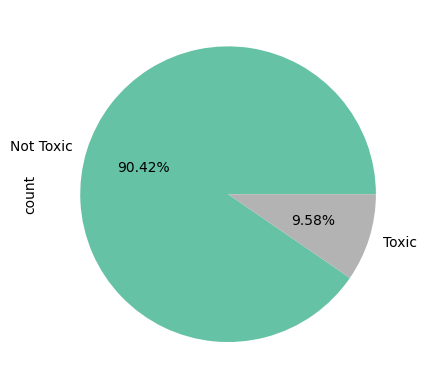

In [7]:
df['toxic'].value_counts().plot(kind='pie',autopct='%.2f%%',labels=['Not Toxic','Toxic'],cmap='Set2')
# distribution of Toxic or Non Toxic. 1 detemines Toxic
plt.show()

In [8]:
# join all the comments to make a new one big comment (1 line)
# start of your code
text = set(' '.join(df['comment_text']).split())
# end of your code
print(f'There are {len(text)} unique words in the whole dataset')


There are 532299 unique words in the whole dataset


# Pre- Processing
Remove Null Values, Duplicates etc . Split the data, and change the structure according to the requiements of PyTorch

## Remove un-necessary values
Remove unwanted columns, Null rows and duplicated rows

In [9]:
# we need just the two columns ('comment_text' and 'toxic')
# drop duplicates and it'll include empty comments too
# we do not need any of the columns with empty values (3 lines)
# start of your code
df = df[['comment_text', 'toxic']]  # keep only the two necessary columns
df = df.drop_duplicates()  # drop duplicate rows
df = df.dropna(subset=['comment_text'])  # drop rows where 'comment_text' is NaN
# end of your code
df.head()


,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


## Split Data
Split Data into 3-Fold Training, Validation and tsting dataframes and save to memory for later use.

In [10]:
df,test_df = train_test_split(df,test_size=0.25,random_state=SEED,stratify=df['toxic'])
# stratify tries to split in a manner that distribution of 'toxic' is same in both train and test

train_df,val_df = train_test_split(df,test_size=0.20,random_state=SEED,stratify=df['toxic'])

train_df.reset_index(drop=True),val_df.reset_index(drop=True), test_df.reset_index(drop=True)
# split the data while preserving the type of the data. It preserves the original Index so you need to reset
print(f'train_df is of type {type(train_df,).__name__} and is having a shape {train_df.shape}')

# save the dataframes so that we can directly use those from disk by using PyTorch's modules
train_df.to_csv('train.csv',index=False)
val_df.to_csv('val.csv',index=False)
test_df.to_csv('test.csv',index=False)

train_df is of type DataFrame and is having a shape (95742, 2)


## Changing Structure
Change the structure of data according to PyTorch's requirements

In [11]:
import nltk
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
text_field = Field(tokenize=word_tokenize)
# tokenize text using word_tokenize and convert to numerical form using default parameters

label_field = LabelField(dtype=torch.float)
# useful for label string to LabelEncoding. Not useful here but doesn't hurt either

fields = [('comment_text', text_field), ('toxic', label_field)]
# use TabularDataset to split train, val and test (1 line)
# start of your code
train, val, test = TabularDataset.splits(
    path='',
    train='train.csv',
    validation='val.csv',
    test='test.csv',
    format='csv',
    fields=fields,
    skip_header=True
)
# end of your code


Let us explore that what exactly is in the `train`, `test`

In [13]:
print(f'Type of "train:" {type(train)}\n Length of "train": {len(train)}\n' )
i = random.randint(0,len(train)) # generate a random index  within the lenth of train
print(f'Keys at index {i} of "train": {train[i].__dict__.keys()}\n')
print("Contents at random index:\n",vars(train.examples[i]))
# vars is used to see the whole dictonary when the classes or modules have __dict__() used

Type of "train:" <class 'torchtext.data.dataset.TabularDataset'>
 Length of "train": 95742

Keys at index 47269 of "train": dict_keys(['comment_text', 'toxic'])

Contents at random index:
 {'comment_text': ['File', ':', 'Benetton.jpg', 'listed', 'for', 'deletion', 'A', 'file', 'that', 'you', 'uploaded', 'or', 'altered', ',', 'File', ':', 'Benetton.jpg', ',', 'has', 'been', 'listed', 'at', 'Wikipedia', ':', 'Files', 'for', 'deletion', '.', 'Please', 'see', 'the', 'discussion', 'to', 'see', 'why', 'this', 'is', '(', 'you', 'may', 'have', 'to', 'search', 'for', 'the', 'title', 'of', 'the', 'image', 'to', 'find', 'its', 'entry', ')', ',', 'if', 'you', 'are', 'interested', 'in', 'it', 'not', 'being', 'deleted', '.', 'Thank', 'you', '.'], 'toxic': '0'}


## Build Vocab
out of 85000000 words, we choose to have just 100000 `UNIQUE` words to build a vocab. Words that are not a part of our vocab will be represented by specialised token, let's assume `<unk>`. There will be 1 extra token apart from `<unk>` and that'll be padding token `<pad>` .

In [14]:
text_field.build_vocab(train,max_size=100000)
label_field.build_vocab(train)

# words are stored as integers withn the vocab for internal data structure handling.
# let us look at the {'word':respective_integer} of first 15
# this is just pure python code to get first N elements from a a dictonary, as a dictonary (1 line)
N = 15
# start of your code
first_N_words = dict(list(text_field.vocab.stoi.items())[:N])
# end of your code
print(f"First {N} words in the vocab are: {first_N_words}")

First 15 words in the vocab are: {'<unk>': 0, '<pad>': 1, '.': 2, ',': 3, 'the': 4, 'to': 5, "''": 6, 'of': 7, 'I': 8, 'and': 9, 'a': 10, 'you': 11, 'is': 12, '``': 13, 'that': 14}


In [15]:
print(f"Most common 15 words in the vocab are: {text_field.vocab.freqs.most_common(15)}")
# integers i int the second part of each tuples are the frequencies of words in the vocab. They show that how many
# number of times this specific word has apprered in the whole training data set

Most common 15 words in the vocab are: [('.', 301202), (',', 283170), ('the', 270901), ('to', 175726), ("''", 145097), ('of', 132634), ('I', 132309), ('and', 127387), ('a', 122779), ('you', 108274), ('is', 105156), ('``', 93541), ('that', 91216), ('in', 80271), ('it', 74468)]


## BucketIterator
`BucketIterator` is very useful for text processing because it returns the batch of texts which have almost same length. <font color='cornflowerblue'>As we know that while calculating gradients during the BPTT, the gradients are calculated to the whole length of text</font> and because <font color='coral'>we always calculate the gradients on the batches but not on an individual example to speed up the process, we'll have to pad the short length texts</font>. So the `BatchIterator` minimizes the hassle by making a batch which has all of the texts of same length more or less.

In [16]:
train_iter, val_iter, test_iter = BucketIterator.splits((train,val,test), batch_sizes=(32,128,128),
                                              sort_key=lambda x: len(x.comment_text),
                                              sort_within_batch=False,
                                              device=device) # use the cuda device if available

# Build Model
We'll build a class based model. Bes thing about PyTorch is that first of al it Dynamic in nature and scondly it is very close to the Neural Networks as you have to pass in the in,out and all the parameters. In case you are looking at the `PyTorch` the very first time, I'll highly recommend you to go and [check this notebook](https://www.kaggle.com/deshwalmahesh/pytorch-detailed-tutorial-for-beginners-using-cnn) which is dedicated towards the working of `PyTorch` and provides in depth knowledge.

I hope you have been through the tutorials and know about the all the layers and structure. One thing that the notebook does not cover in that tutorial is `Embedding Layer`.

**From the `PyTorch's` documentation:**

<font color='coral'>A simple lookup table that stores embeddings of a fixed dictionary and size.
    
This module is often used to store word embeddings and retrieve them using indices. The input to the module is a list of indices, and the output is the corresponding word embeddings.</font></br>

Before we want to give you a definition of that, let us look at a scenario:

What if I ask you that what is common between `Eminem` and `Kanye`? Those who have something to do with Music will describe the features as the most accurately as `Rappers`. Those who have no knowledge of those but know there are English names, they'll describe that `Male English Names`. Those with just basic names will describe `English Words`. So like this, we have 3 features in our hand for 2 different attributes. What if I ask that what is difference between a `plastic bag` and `6ix9ine`??? You have no idea what that can be. You can't tell that both tend to have `garbage mostly`  until yov've seen the workings of both. This is exactly what we call `Embeddings` or `Latent Features`. Our Model can generate `K` new features from the existing `N` features in the data so that the model can learn from the hidden features insted of those original features. So if we train on the `lyrics of 6ix9ne`, `essays about garbage`, `Eminem biography` etc etc, it'll tend to put the first 2 in the category of `trash` and the last one as `legend` even if the computer has no knowledge about what just happed. I Guess my model is more intelligent and has better music taste than many people out there ;)

**<font color='#2ef90'>Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.</font>**

**<font color='red'>NOTE: While looking at the structure, please ignore the `LSTM` for now. Structure is almost same for both `RNN` and `LSTM` in `PyTorch` but working is different. To save the hassle of re-designing the network, I have used `if-else` statement. Later, I'll be talking about the LSTM too.</font>**

In [17]:
class Network(torch.nn.Module):
    '''
    It inherits the functionality of Module class from torch.nn whic includes al the layers, weights, grads setup
    and methods to calculate the same. We just need to put in the required layers and describe the flows as
    which layers comes after which one
    '''

    def __init__(self,in_neuron,embedding_dim=128,hidden_size=256,out_neuron=1,m_type='rnn',drop=0.53,**kwargs):
        '''
        Constructor of the class which will instantiate the layers while initialisation.

        NOTE: Order of the layer defined here has nothing to do wit hthe working. Just like we can define Drouout()
        layer anywhere in ithe init() but actual working depends on the forward() method  as well as the input
        and output shapes. You should be aware of the in,out shapes as the mismatch can produce error.

        args:
            in_neuron: input dimensions of the first layer {int}
            embedding_dim: number of latent features you want to calculate from the input data {int} default=128
            hidden_size: neurons you want to have in your hidden RNN layer {int} default=256
            out_neuron: number of outputs you want to have at the end.{int} default=1
            model: whether to use 'rnn' or 'lstm' {string}
            drop: proportion of values to dropout from the previous values randomly {float 0-1} default=0.53
            **kwargs: any torch.nn.RNN or torch.nn.LSTM args given m_type='rnn' or'lstm' {dict}
        out:
            return a tensor of shape {batch,out_neuron} as output
        '''
        super(Network,self).__init__() # call the constructor of Base Class
        self.m_type = m_type

        # embedding layer is always the first layer (1 line)
        # start of your code
        self.embedding = nn.Embedding(in_neuron, embedding_dim)
        # end of your code

        # whether to use the LSTM type model or the RNN type model. It'll use only 1 in forward()
        # Note: Don't forget to pass them kwargs (3 lines)
        # start of your code
        if self.m_type == 'lstm':
          self.lstm = nn.LSTM(embedding_dim, hidden_size, **kwargs)
        elif self.m_type == 'gru':
          self.gru = nn.GRU(embedding_dim, hidden_size, **kwargs)
        else:
          self.rnn = nn.RNN(embedding_dim, hidden_size, **kwargs)
        # end of your code

        # drop the values by random which comes from previous layer and last fully connected layer (2 lines)
        # start of your code
        self.dropout = nn.Dropout(drop)

        self.dense = nn.Linear(hidden_size, out_neuron)
        # end of your code

    def forward(self,t):
        '''
        Activate the forward propagation of a batch at a time to transform the input bath of tensors through
        the different layers to get an out which then will be compared to original label for computing loss.
        args:
            t: tensors in the form of a batch {torch.tensor}
        '''
        # Step:1 pass the incoming tensor to the first layer to get embeddings (1 line)
        # start of your code
        embedding_t = self.embedding(t)
        # end of your code

        # Step 2: Apply dropout
        # start of your code
        drop_emb = self.dropout(embedding_t)
        # end of your code

        # Step 3: Get hidden state and output. It'll use either LSTM or gru or RNN (3 lines)
        # Note: shape of rnn_out = (seq_len, batch, num_directions * hidden_size)
        # start of your code
        if self.m_type == 'lstm':
            out, (hidden_state, _) = self.lstm(drop_emb)
        elif self.m_type == 'gru':
            out, hidden_state = self.gru(drop_emb)
        else:
            out, hidden_state = self.rnn(drop_emb)
        # end of your code

        # Step 4: Remove the extra axis from Hidden State (1 line)
        # Note: shape of hidden_state = (num_layers * num_directions, batch, hidden_size) = (1*1,b,h) so extra 1 layer
        # start of your code
        hidden_squeezed = hidden_state.squeeze(0)
        # end of your code

        # Step 5: Assert to check. if failed, AssertionError error will be thrown
        assert torch.equal(out[-1,:,:],hidden_squeezed)
        # out_rnn is concatenation of hidden states so squeezed hidden and last value of out_rnn should be equal

        # Step 6: Pass the "last" hidden state only because we only want 1 output based on the last hidden state
        return self.dense(hidden_squeezed) # these are not the probabilities. We still need to use an activation

# Train Model

In [18]:
def train_network(network,train_iter,optimizer,loss_fn,epoch_num):
    '''
    train the network using given parameters
    args:
        network: any Neural Network object
        train_batch: iterator of training data
        optimizer: optimizer for gradients calculation and updation
        loss_fn: appropriate loss function
        epoch_num = Epoch number so that it can show which epoch number in tqdm Bar
    out:
        a tuple of (average_loss,average_accuracy) of floating values for a single epoch
    '''
    epoch_loss = 0 # loss per epoch
    epoch_acc = 0 # accuracy per epoch

    network.train() # set the model in training mode as it requires gradients calculation and updtion
    # turn off while testing using  model.eval() and torch.no_grad() block

    for batch in tqdm(train_iter,f"Epoch: {epoch_num}"):
        # data will be shown to model in batches per epoch to calculate gradients per batch
        # step 1: clear all the calculated grdients from previous step
        # step 2: squeeze out the extra dimension [batch_size,1]
        # step 3: calculate loss on the whole batch
        # step 4: sigmoid will convert each output value (which is a single float value for each sentence in batch)
        # to probability between {0,1}. round is nothing but setting the threshold at 0.5 that if probability
        # is greater than 0.5, it belongs to one class and if it is less than 0.5, it belongs to other
        # step 5: get a floating tensors of predicted classes  which match original true class
        # step 6: calculate acc
        # step 7: Start Back Propagation so that model can calculate gradients based on loss
        # step 8: update the weights based on gradient corresponding to each neuron
        # step 9: add the loss for this batch to calculate the loss for whole epoch
        # step 10: add the acc for this batch to calculate the acc for whole epoch (10 lines)

        # start of your code
        optimizer.zero_grad()
        predictions = network(batch.comment_text).squeeze(1)
        loss = loss_fn(predictions, batch.toxic)
        preds = torch.round(torch.sigmoid(predictions))
        correct = (preds == batch.toxic).float()
        acc = correct.sum() / len(correct)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        # end of your code


        time.sleep(0.001) # for tqdm progess bar

    return epoch_loss/len(train_iter), epoch_acc/len(train_iter)

In [19]:
def evaluate_network(network,val_test_iter,optimizer,loss_fn):
    '''
    evaluate the network using given parameters
    args:
        network: any Neural Network object
        val_test_iter: iterator of validation/test data
        optimizer: optimizer for gradients calculation and updation
        loss_fn: appropriate loss function
    out:
        a tuple of (average_loss,average_accuracy) of floating values for the incoming dataset
    '''
    total_loss = 0  # total loss for the whole incoming data
    total_acc = 0 # total accuracy for the whole data

    network.eval() # set the model in evaluation mode to not compute gradients and reduce overhead

    with torch.no_grad(): # turn of gradients calculation

        for batch in val_test_iter:
            # step 1: squeeze out the extra dimension [batch_size,1]
            # step 2: calculate loss on the whole batch
            # step 3: sigmoid will convert each output value (which is a single float value for each sentence in batch)
            # to probability between {0,1}. round is nothing but setting the threshold at 0.5 that if probability
            # is greater than 0.5, it belongs to one class and if it is less than 0.5, it belongs to other
            # step 4: get a floating tensors of predicted classes  which match original true class
            # step 5: calculate acc
            # step 6: add the loss for this batch to calculate the loss for whole epoch
            # step 7: add the acc for this batch to calculate the acc for whole epoch (7 lines)

            # start of your code
            predictions = network(batch.comment_text).squeeze(1)
            loss = loss_fn(predictions, batch.toxic)
            preds = torch.round(torch.sigmoid(predictions))
            correct = (preds == batch.toxic).float()
            acc = correct.sum() / len(correct)
            total_loss += loss.item()
            total_acc += acc.item()
            # end of your code

        return total_loss/len(val_test_iter), total_acc/len(val_test_iter)

## RNN
We'll train our RNN First

In [20]:
in_neuron = len(text_field.vocab)
lr = 3e-4 # learning rate = 0.0003

network = Network(in_neuron) # instantiate the RNN object. other parameters remain default
if torch.cuda.is_available():
    network.cuda() # activate GPU spport

optimizer = torch.optim.Adam(network.parameters(),lr=lr) # use Adam Optimizer
loss_fn = torch.nn.BCEWithLogitsLoss() # Sigmoid activation with Binary Cross Entropy loss. This is more
# numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one
# layer,we take advantage of the log-sum-exp trick for numerical stability

for epoch in range(EPOCH):
    train_loss, train_acc = train_network(network,train_iter,optimizer,loss_fn,epoch+1)
    val_loss,val_acc = evaluate_network(network,val_iter,optimizer,loss_fn)
    tqdm.write(f'''End of Epoch: {epoch+1}  |  Train Loss: {train_loss:.3f}  |  Val Loss: {val_loss:.3f}  |  Train Acc: {train_acc*100:.2f}%  |  Val Acc: {val_acc*100:.2f}%''')

Epoch: 1:   0%|          | 0/2992 [00:00<?, ?it/s]

End of Epoch: 1  |  Train Loss: 0.318  |  Val Loss: 0.346  |  Train Acc: 90.38%  |  Val Acc: 88.49%


## GRU

In [21]:
network = Network(in_neuron,m_type='gru')

if torch.cuda.is_available():
    network.cuda() # activate GPU spport

# optimizer and losses remains the same

for epoch in range(EPOCH):
    train_loss, train_acc = train_network(network,train_iter,optimizer,loss_fn,epoch+1)
    val_loss,val_acc = evaluate_network(network,val_iter,optimizer,loss_fn)
    tqdm.write(f'''End of Epoch: {epoch+1}  |  Train Loss: {train_loss:.3f}  |  Val Loss: {val_loss:.3f}  |  Train Acc: {train_acc*100:.2f}%  |  Val Acc: {val_acc*100:.2f}%''')

Epoch: 1:   0%|          | 0/2992 [00:00<?, ?it/s]

End of Epoch: 1  |  Train Loss: 0.702  |  Val Loss: 0.699  |  Train Acc: 45.74%  |  Val Acc: 39.83%


## LSTM
LSTM is a specialised version of RNN which has 4 Gates. Instead of updating the states by using the the previous values in RNN, these 4 gates together do the following tasks:
1. Which Information is valuable
2. Which information we have to keep
3. Which information we have to forget
4. Which information will be used to update the state
5. Which information has become obsolete and we have to forget it

In [22]:
network = Network(in_neuron,m_type='lstm')

if torch.cuda.is_available():
    network.cuda() # activate GPU spport

# optimizer and losses remains the same

for epoch in range(EPOCH):
    train_loss, train_acc = train_network(network,train_iter,optimizer,loss_fn,epoch+1)
    val_loss,val_acc = evaluate_network(network,val_iter,optimizer,loss_fn)
    tqdm.write(f'''End of Epoch: {epoch+1}  |  Train Loss: {train_loss:.3f}  |  Val Loss: {val_loss:.3f}  |  Train Acc: {train_acc*100:.2f}%  |  Val Acc: {val_acc*100:.2f}%''')

Epoch: 1:   0%|          | 0/2992 [00:00<?, ?it/s]

End of Epoch: 1  |  Train Loss: 0.628  |  Val Loss: 0.636  |  Train Acc: 90.09%  |  Val Acc: 89.91%


# Bidirectional RNN/ LSTM
These are specialised version of RNN which not only look at the past but the future too. Means instead of looking at 1 word at time, they look at two words but in opposite direction. Don't worry, let us try to see with an example. Suppose we have sentence `Shady Records not shady plans`. In the birdirectional structure, we'll ave 2 `pipelines` (RNN Cells) working in different direction. First will be like a simple RNN reading words `H0` + `Shady` -> `H1` -> `H1`+ Records -> `H2` and so on .... In the same time, there will be another RNN cells working backwards in the same way.. They'll be Doing `H_0` + `plans` -> `H_1` -> `H_1` + `shady` -> `H_2` and so on..... So in this way, the first output at time step `T0` will be a combination of both **First Hidden State from One Pipeline + Last Hidden State from Second Line**. And for the Last Time stem `Tn`, it'll be **Last Hidden State of one Pipeline + First Hidden State of Second Pipeline**. In this way, it'll calculate First to last and last to first states simultaneously. So the two hidden states will updted by not just past but Future too.

**This is helpful in predictions where the Past is dependent on the future**. Such as in cases where we have to predict "it ___ that's why I had an umbrella with me"

## Multi Layer (Deep) RNN
In this type of RNN, we can have `RNN/LSTM/GRU` cells not only giving Hidden States to cells to their right(Uni directional) but to cell that is above to them. We can see that like two boxes stacked over two boxes. So any cell at time T, not only uses the Hidden state from the cells before it but from the cells below it too. SO any output would then be a function of `2 hidden states and the inputs` **For a two layered** architecture.

YOu can learn more about Deep RNNs by visiting [this Youtube link](https://www.youtube.com/watch?v=U7wN1x8zsG8&t=0s)

**<font color='red'>NOTE: We can use Bidirectional with Stacked to have a very powerfulNetwork. In this setup, each cell will be having 3 different `Hidden States` each from left,right and below cell</font>**

## Build Deep Bi-Directional RNN

In [23]:
class DeepNetwork(torch.nn.Module):
    '''
    Deep RNN Network which can have either one both of stacked and bi-directional properties
    '''

    def __init__(self,in_neuron,embedding_dim=100,hidden_size=256,out_neuron=1,m_type='rnn',drop=0.53,**kwargs):
        '''
        Constructor of the class which will instantiate the layers while initialisation.

        args:
            in_neuron: input dimensions of the first layer {int}
            embedding_dim: number of latent features you want to calculate from the input data {int} default=100
            hidden_size: neurons you want to have in your hidden RNN layer {int} default=256
            out_neuron: number of outputs you want to have at the end.{int} default=1
            model: whether to use 'rnn','lstm' or 'gru' {string}
            drop: proportion of values to dropout from the previous values randomly {float 0-1} default=0.53
            **kwargs: any valid torch.nn.RNN, torch.nn.LSTM or torch.nn.GRU args with either 'bidirectional'=True
                      or 'num_layers'>1
        out:
            return a tensor of shape {batch,out_neuron} as output
        '''
        super(DeepNetwork,self).__init__()

        self.m_type = m_type

        # embedding layer is always the first layer (1 line)
        # start of your code
        self.embedding = nn.Embedding(in_neuron, embedding_dim)
        # end of your code

        # whether to use the LSTM type model or the RNN type model. It'll use only 1 in forward()
        # Note: Don't forget to pass them kwargs (3 lines)
        # start of your code
        if self.m_type == 'lstm':
           self.lstm = nn.LSTM(embedding_dim, hidden_size, **kwargs)
        elif self.m_type == 'gru':
            self.gru = nn.GRU(embedding_dim, hidden_size, **kwargs)
        else:
            self.rnn = nn.RNN(embedding_dim, hidden_size, **kwargs)
        # end of your code

        # drop the values by random which comes from previous layer and last fully connected layer (2 lines)
        # Note: Last output Linear Layer will have the two Hidden States from both the directions to have the result
        # start of your code
        self.dropout = nn.Dropout(drop)

        self.dense = nn.Linear(hidden_size * 2, out_neuron)
        # end of your code

    def forward(self,t):
        '''
        Activate the forward propagation
        args:
            t: tensors in the form of a batch {torch.tensor}
        '''
        # Step:1 get embeddings and dropout (1 line)
        # start of your code
        embedding_t = self.dropout(self.embedding(t))
        # end of your code

        # Step 2: Get hidden state and output. It'll use either LSTM or gru or RNN (3 lines)
        # Note: shape of rnn = (seq_len, batch, num_directions * hidden_size)
        # start of your code
        if self.m_type == 'lstm':
            out, (hidden_state, _) = self.lstm(embedding_t)
        elif self.m_type == 'gru':
            out, hidden_state = self.gru(embedding_t)
        else:
             out, hidden_state = self.rnn(embedding_t)
        # end of your code

        # Step 3: Concatenate the last and second last hidden. One is from backward and one is from forward (1 line)
        # start of your code
        t = torch.cat((hidden_state[-2,:,:], hidden_state[-1,:,:]), dim=1)
        # end of your code

        return self.dense(t)

## Train and Evaluate

In [24]:
rnn_kwargs = {'num_layers':2,'bidirectional':True}
in_neuron = len(text_field.vocab)

network = DeepNetwork(in_neuron, m_type='rnn', **rnn_kwargs)

if torch.cuda.is_available():
    network.cuda() # activate GPU spport

# optimizer and losses remains the same

for epoch in range(EPOCH):
    train_loss, train_acc = train_network(network,train_iter,optimizer,loss_fn,epoch+1)
    val_loss,val_acc = evaluate_network(network,val_iter,optimizer,loss_fn)
    tqdm.write(f'''End of Epoch: {epoch+1}  |  Train Loss: {train_loss:.3f}  |  Val Loss: {val_loss:.3f}  |  Train Acc: {train_acc*100:.2f}%  |  Val Acc: {val_acc*100:.2f}%''')

Epoch: 1:   0%|          | 0/2992 [00:00<?, ?it/s]

End of Epoch: 1  |  Train Loss: 0.755  |  Val Loss: 0.766  |  Train Acc: 28.12%  |  Val Acc: 22.45%


You can try to work on different combinations of Deep, Bidirectional and type of RNN (LSTM, GRU, or plain RNN) to select a model. Some of the models will perform good while other will perform very poorly with the default 3 Epoch. You can change the Parameters to have a better model.

# Embeddings
## Text as Numbers
Before we start on Embeddings let us talk about how you can represent text? Text is, youn know "text" and machines only know numbers so in order to tell the machine about the text, we use different approaches most widely as `Boolean Matrix or One Hot Encoding`, `Frquency Based or TfIdf` and `Sementic Based or Embeddings`.

For example in the sentence `Messi, Eminem and Lebron, they all have achieved greatness to a certain level that it seems like nobody in the near future is going to be even closeer to the half way mark.`

There are few choices and the simplese being is giving each unique word a number and getting a vector of length  equal to the total number of words in the sentence. So let us suppose Messi becomes 1, Eminem becomes 2 and so on to represent all the sentences. But the problem with this method is that the model will think Eminem `2` has more influence than Messi `1` in the sentence but in fact there is no ordering.

### <font color='teal'>Boolean Vectors:</font>

We can have a work around it. We can take every word in all the sentences and and make a vector of length equal to all the number of all the unique words in all the sentences and replace. For example in the 3 sentences, `My name is Marshall`, `Shady is my alter ego`,` Eminem is my stage name`, We'll have 9 unique words ans every sentence will be represented by a vector of length 9 where every word will be represented by a 1 if present at a certain location. For example if `name` is represented by the 2nd index, then in the **First** and **Third** sentence, the second index will be a 1 instead of zero where in the **Second** sentence, it'll be a zero because in First and thrird, `name` is present and is defined by the index position 2. This is all cool until it's not. There are lots of problems with the scenario. For example, if a sentence comes, `Hi!!`, then it'll be adding one more dto the length of vector and even though it's length is just one, it'll be represented by a vector of length 10 where 9 of the indices are filled by 0. Another problem is that when a sentence like `Shady is not shady by heart` comes, even though the word `shady` has come twice, it'll be a single 1 at the inde defined so model will have no way of knowing whether the word came 1 or 1000 times.

### <font color='teal'>Frequency Based:</font>

We can modify the above problem by giving the position a number equal to the frequeny of word  ( how many times the word has repeated in the sentence) so at a defined index of `Shady`, it'll be a 2. Now let us think about pronouns, articles and connectors. They repeat a lot and lot (a,an,the,at,from,on ...bla bla bla..) So if a frequency is given, again it'll make the model think that `at` is more **TfIdf: Tern Frequency Inverse Term Frequency**. What it does is that it gives the words more weightage which appear more in a document. For example in an article Title about `Eminem is the Greatest: Why?` there will be lots of times when `Eminem` and `greatest` will be there that can easily define the Title of the Article but lots of time there will be `a,an,the,at` will bethere in article too which can hamper. So `TfIdf` surely gives more weightage to the words repeated in lines but it'll penalize the words which comes too often in the whole article which will surely be the non essential words like `a,an,the` etc. This methos eeems perfect but  what about when we want to find the relation of `Eminem` to the `Greatest`?? There is no way to find that using any of the above techniques. This is where the Next Part Comes into play.

## Embeddings

Solution to all the problems lies in the Embeddings. Word embedding methods learn a real-valued vector representation for a predefined fixed sized vocabulary from a corpus of text. The learning process is either joint with the neural network model on some task, such as document classification, or is an unsupervised process, using document statistics.

Confused?? Don't be. Word Embeddings are the Words converted to a Vector of Length  `N` which consists floating values usually in range 0-1. These vectors are not at random but they are there for a reason. If the distance between 2 vectors are small in that embedding means that those two vectors are somehow (and I mean SOMEHOW) related. In this context, we'll say that the disctance of the vector formed by `Moon` will closer to`Earth`  tha `Apple`. Simlarly, the embeddings can JUSt KNOW that Paris, New Delhi and London are related and will have very short distances. These Embeddings represent N dimensional HIDDEN features between words. For Example there are 3 hidden features explored by Embeddings by words as `[Scary`, `Soft` ,`Intelligent]` in the range 0-1. If we have 3 words as ``Cat``,`Gun` and `Human`, then the vector for `Human = [0.3, 0.3, 0.9], Gun = [0.8, 0.1, 0.01], Cat = [0.4, 0.9, 0,4]`. Which means that Human is somewhat scary, somewhat sft but highly intelligent and a cat is scary but super soft. The only thing to note here is that the **Machine Learning Model does not even know what  it has found. To the model, these are some random dimensions and according to these dimensions, these words (one hot encoded vectors) relate.**

Whatever I have just described can be seen viually and mathematically by watching [this Andrew NG video](https://www.coursera.org/lecture/nlp-sequence-models/word-representation-6Oq70)

## How to?
Embeddings are generally generated by using the statistical means on a **HUGE CORPUS OF CLEANED DATA**. There are predefined embeddings such as Google's Word2Vec and Stanford's GloVe but you can use your own Embeddings too by using an `EmbeddingLayer` as the first layer in any Neural Network. The dimension of this layer will be the number of hidden features you want to get and the updated with each epochs will be in a manner to get the context from your data.

A very detailed and intutive explanation about Embeddings and it's types is given in [this post](https://machinelearningmastery.com/what-are-word-embeddings/).

## GloVe: Global Vectors for Word Representation

We'll be using **GLoVE** which is a hybrid approach to mix both the global statistics of matrix factorization techniques like LSA with the local context-based learning in Word2Vec. Rather than using a window to define local context, GloVe constructs an explicit word-context or word co-occurrence matrix using statistics across the whole text corpus. The result is a learning model that may result in generally better word embeddings.

GloVe has used  `word-co-occurnce` and `Nearst Neighbour` to get all these embeddings using a Neural Network. It mans that given a word, it tries to find the similar words used in the same **CONTEXT** and given a context, it tries to find words that can be used in the same context. For example let us assume that as `Lionel` and `Messi` are used most of the times together so given `Lionel`, it'll try to predict `Messi` and vice versa (word-Co-occurance). In the same way `Messi` and `Football` are used together in the same context so when you try to look up for similar words as `Messi`, it'll give you `Football` (context).

## Working of GloVe
Working of GloVe is quite interesting. It has learned that `man+feminine` = `woman`  so `king+femenine` = `queen`. In other words, it can find the relation that if you subtract the two vectors and add the third vector, it can find a 4th vector which is related to 3rd vector in the same 2nd is related to 1st. For example if you do, `woman-man+king`, it'll return `queen` as `woman-man` will give you the `femenine` dimension and adding femenine to king will be equal to queen.# Thank You
In the next part, We'll be covering Embeddings (such as GloVe, Word2Vec), Sequence-to-Sequence Modelling, Attention Modelling with Google's BERT to perform tasks which are not possible with fixed length inputs and outputs.

In [25]:
# Load GloVe embeddings
glove = GloVe(name='6B', dim=100)  # Adjust dim to match the chosen GloVe embedding dimension

print(f'Shape of GloVe vectors is {glove.vectors.shape}')

.vector_cache/glove.6B.zip: 862MB [02:38, 5.42MB/s]                           
100%|█████████▉| 399999/400000 [00:21<00:00, 18857.36it/s]


Shape of GloVe vectors is torch.Size([400000, 100])


This means tht there are 400000 words and each one represented by a vector length 100. Every word in this vocab has a unique integer number **for internal storage purpose only**. Words are converted to vectors and and you can use `glove.stoi['some_small_cased_word']` to see the identifier of that word.

To access the vector representation of that word, simply use `glove['word']`. When a word is not found in the glove, it is changed by a `<unk>` vector of all zeros of same size.

In [26]:
print(f"eminem is represented by the index location at: {glove.stoi['eminem']} and has the following vector values: \n {glove['eminem']}")

eminem is represented by the index location at: 20500 and has the following vector values: 
 tensor([ 0.7544, -0.0373,  0.9011, -0.2475,  0.6046,  0.2633,  0.4321, -0.0581,
         0.2454,  0.4725,  0.4708,  0.6857, -0.1124, -0.5863,  0.6069,  0.2199,
         0.3303, -0.4111,  0.4995,  0.5576,  0.5199, -0.7013,  0.1960,  0.0222,
         0.1784,  1.2870,  0.0808, -0.0457,  0.6343, -0.1123,  0.5205,  0.5357,
         0.6573,  1.4612, -0.5139,  0.1027,  0.3214,  0.3201, -0.2493, -0.1228,
         0.7139,  0.5747, -0.0808,  0.0766, -0.8888, -0.6424, -0.3580, -0.1718,
         0.0162, -0.4686, -0.1671, -0.2047,  0.3036,  0.0647, -0.4121, -0.6413,
         0.0488, -0.1874, -1.0129,  0.3502, -0.0286,  0.8700, -0.1154,  0.0711,
         0.8362,  0.0659,  1.2272,  0.4069,  0.0153,  0.0362, -0.3664,  0.8553,
        -0.8979,  0.5335, -0.2803, -0.4116,  0.1657, -0.0971,  0.8507, -1.0010,
         0.6556, -0.2359,  0.1473,  0.4138, -0.9671,  0.0302, -0.4406, -0.0727,
         0.1327,  0.0797, -

# GloVe Helpers

In [27]:
def get_vector(glove, word):
    '''
    Get the vector corresponding to a word from Glove
    args:
        glove: glove embeddings
        word:  any word
    out: a vector of dimensions according to the embedding size. If a word is not present, it returns zero vector
    '''
    # Note: first convert all characters to lower case. (1 line)
    # start of your code
    word = word.lower()
    if word in glove.stoi:
        output = glove[word]
    else:
        output = torch.zeros(glove.dim)
    # end of your code
    return output



def find_closest(glove, input_value, n=6, vector=False):
    '''
    Find the closest words to a given word from the embedding
    args:
        glove: glove embeddings
        input_value: {string,vector} any English word or vector representation from embedding
        n: number of closest words to return
        vector: whether input type is a word or a vector
    out:
        list of tuples of words and similarities
    '''
    if not vector:
        vector = get_vector(glove, input_value)
    else:
        vector = input_value

    # start of your code
    vector = vector.unsqueeze(0)
    similarities = torch.nn.functional.cosine_similarity(vector, glove.vectors)
    similarities = similarities.cpu().numpy()
    sorted_indices = similarities.argsort()[::-1]
    sorted_distances = []
    for idx in sorted_indices:
        word = glove.itos[idx]
        if word != input_value:
            sorted_distances.append((word, similarities[idx]))
        if len(sorted_distances) >= n:
            break
    # end of your code
    return sorted_distances  # return top n



def print_neatly(list_of_tuples):
    '''
    Print a tuple cleanly
    args:
        list_of_tuples: List of tuple of 2 values
    '''
    print('Distances \t Words\n')
    for tup in list_of_tuples:
        print('%.3f \t\t %s'%(tup[1],tup[0]))
    return None


def find_analogy(glove, w1, w11, w2, n=7):
    '''
    Find analogy of the third word given by analogy of two words
    args:
        w1: first word
        w11: analogy of the first word
        w2: second word
        n: number of analogies to find
    out:
        words that can relate to w2 in the same way w11 is related to w1
    '''
    # Note: find extra 3 n (n = n+3)
    # Note: w1, w11 and w2 should not be in the output (6 lines)
    print(f"{w1} : {w11} :: {w2} : ?")
    # start of your code
    w1_vec = get_vector(glove, w1)
    w11_vec = get_vector(glove, w11)
    w2_vec = get_vector(glove, w2)

    target_vec = w11_vec - w1_vec + w2_vec

    sorted_distances = find_closest(glove, target_vec, n=n+3, vector=True)
    closest_n = []
    for word, sim in sorted_distances:
        if word not in [w1, w11, w2]:
            closest_n.append((word, sim))
        if len(closest_n) >= n:
            break
    # end of your code
    return closest_n


# Try out the cool features

In [28]:
print_neatly(find_closest(glove,'eminem'))

Distances 	 Words

0.736 		 rapper
0.734 		 jay-z
0.717 		 kanye
0.687 		 ludacris
0.684 		 rap
0.681 		 dre


In [29]:
print_neatly(find_analogy(glove,'eminem','rapper','messi'))

eminem : rapper :: messi : ?
Distances 	 Words

0.734 		 striker
0.704 		 ronaldinho
0.678 		 midfielder
0.664 		 ronaldo
0.654 		 winger
0.641 		 playmaker
0.639 		 robinho


# Data Processing For GloVe

In [30]:
# step1: tokenize text using word_tokenize and convert to numerical form using default parameters
# step2: useful for label string to LabelEncoding. Not useful here but doesn't hurt either
# step3: (column name, field object to use on that column) pair for the dictionary
# step4: use TabularDataset to split train, val and test
# start of your code (4 lines)
text_field = Field(tokenize=word_tokenize, lower=True, batch_first=True)
label_field = LabelField(dtype=torch.float)

fields = [('comment_text', text_field), ('toxic', label_field)]

train, val, test = TabularDataset.splits(
    path='',
    train='train.csv',
    validation='val.csv',
    test='test.csv',
    format='csv',
    fields=fields,
    skip_header=True
)
# end of your code


text_field.build_vocab(train, max_size=100000, vectors=glove, unk_init=torch.Tensor.zero_)

# unk_init = torch.tensor.normal_ set the initial vectors of vocab as the glove vectors and
# initialize unknown words as normal distribution instead of zeros

label_field.build_vocab(train)


train_iter, val_iter, test_iter = BucketIterator.splits((train,val,test), batch_sizes=(32,128,128),
                                              sort_key=lambda x: len(x.comment_text),
                                              sort_within_batch=False,
                                              device=device)

# Initialize Model & Copy Weights to Embedding Layer

In [37]:
in_neuron = len(text_field.vocab)
embedding_dim = 100 # dimensions of GloVe which we'll use as the dimension for our embedding layer too
drop = 0.0 # how much to drop

loss_fn = torch.nn.BCEWithLogitsLoss()
lr = 0.0003 #learning rate for optimizer
optimizer = torch.optim.Adam(network.parameters(),lr=lr)

network = Network(in_neuron,embedding_dim,drop=drop)

pretrained_embeddings = text_field.vocab.vectors  # get all the 100000+2 vectors
network.embedding.weight.data.copy_(pretrained_embeddings) #copy embeddings as the weights to the layer


# now we have 2 extra embeddings so we'll have to get their index and change the values at index to zeros

unknown_index = text_field.vocab.stoi[text_field.unk_token] # get index of unknown token
padding_index = text_field.vocab.stoi[text_field.pad_token] # get index of padding token

network.embedding.weight.data[unknown_index] = torch.zeros(embedding_dim) #change values to zeros
network.embedding.weight.data[padding_index] = torch.zeros(embedding_dim)

if torch.cuda.is_available():
    network.cuda()
    # network = network.to(device)


# if you do not want to train your Embedding weights, you'll have to make 1 extra change
# model.embedding.weight.requires_grad = False


<h1>Copy the pre-trained embeddings into the model's embedding layer:</h1>

In [34]:
# pretrained_embeddings = text_field.vocab.vectors  # get all the vectors
# network.embedding.weight.data.copy_(pretrained_embeddings)  # copy embeddings into the model

# # Set the embeddings for unknown and padding tokens to zeros
# unknown_index = text_field.vocab.stoi[text_field.unk_token]
# padding_index = text_field.vocab.stoi[text_field.pad_token]

# network.embedding.weight.data[unknown_index] = torch.zeros(embedding_dim)
# network.embedding.weight.data[padding_index] = torch.zeros(embedding_dim)




In [35]:
# # If you do not want to train the embedding weights (i.e., keep them fixed):
# network.embedding.weight.requires_grad = False

# # Ensure that you define your optimizer accordingly if you freeze the embeddings:
# optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, network.parameters()), lr=lr)


<font color='red'>Note: If you have initialised an optimizer, before freezing the weights, then it is okay but **If you Freeze the weights BEFORE passing the parameters into optimizer, then youl'll have to add `optimizer = torch.optim.Adam([ param for param in model.parameters() if param.requires_grad == True],lr=lr)`**</font>

# Train and Evaluate Model

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


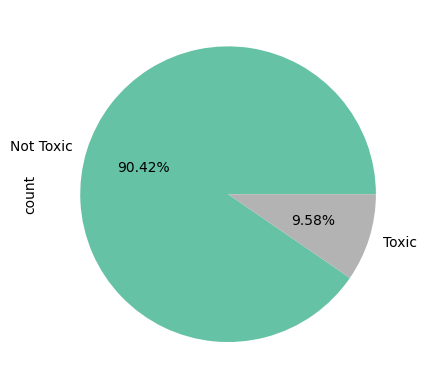

There are 532299 unique words in the whole dataset
train_df is of type DataFrame and is having a shape (95742, 2)
Train dataset size: 95742
Validation dataset size: 23936
Test dataset size: 39893


/usr/local/lib/python3.10/dist-packages/torchtext/vocab.py:432: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.itos, self.stoi, self.vectors, self.dim = torch.load(path_

End of Epoch: 1  |  
                   Train Loss: 0.250  |  
                   Val Loss: 0.217  |  
                   Train Acc: 91.48%  |  
                   Val Acc: 92.70%


Epoch 2: 100%|██████████| 2992/2992 [01:44<00:00, 28.65it/s]


End of Epoch: 2  |  
                   Train Loss: 0.193  |  
                   Val Loss: 0.365  |  
                   Train Acc: 93.24%  |  
                   Val Acc: 84.19%


Epoch 3: 100%|██████████| 2992/2992 [01:43<00:00, 28.78it/s]


End of Epoch: 3  |  
                   Train Loss: 0.200  |  
                   Val Loss: 0.214  |  
                   Train Acc: 93.14%  |  
                   Val Acc: 91.41%


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext.data import Field, LabelField, TabularDataset, BucketIterator
from torchtext.vocab import GloVe
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk import word_tokenize
import random
from tqdm import tqdm
import time
import os
import nltk

# Download NLTK resources
nltk.download('punkt')

# Set Defaults & Globals
SEED = 13
EPOCH = 3  # Example epoch count, adjust as needed
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Input & EDA
# Read data.csv file with pandas
df = pd.read_csv('data.csv')
df.head()

# Plot distribution of toxic vs non-toxic
df['toxic'].value_counts().plot(kind='pie', autopct='%.2f%%', labels=['Not Toxic','Toxic'], cmap='Set2')
plt.show()

# Join all the comments to make a new one big comment
text = set(' '.join(df['comment_text']).split())
print(f'There are {len(text)} unique words in the whole dataset')

# Pre-Processing
# Remove unnecessary values
df = df[['comment_text', 'toxic']]  # Keep only the two necessary columns
df = df.drop_duplicates()  # Drop duplicate rows
df = df.dropna(subset=['comment_text'])  # Drop rows where 'comment_text' is NaN
df.head()

# Split Data
train_df, test_df = train_test_split(df, test_size=0.25, random_state=SEED, stratify=df['toxic'])
train_df, val_df = train_test_split(train_df, test_size=0.20, random_state=SEED, stratify=train_df['toxic'])
train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(f'train_df is of type {type(train_df).__name__} and is having a shape {train_df.shape}')

# Save the dataframes
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)
test_df.to_csv('test.csv', index=False)

# Define fields
text_field = Field(tokenize=word_tokenize, batch_first=True, lower=True)
label_field = LabelField(dtype=torch.float, sequential=False, use_vocab=False)

fields = [('comment_text', text_field), ('toxic', label_field)]

# Use TabularDataset to split train, val, and test
train, val, test = TabularDataset.splits(
    path='./',  # Use './' if files are in the current directory
    train='train.csv',
    validation='val.csv',
    test='test.csv',
    format='csv',
    fields=fields,
    skip_header=True
)

print(f"Train dataset size: {len(train)}")
print(f"Validation dataset size: {len(val)}")
print(f"Test dataset size: {len(test)}")

# Build vocabulary
glove = GloVe(name='6B', dim=100)
text_field.build_vocab(train, max_size=100000, vectors=glove, unk_init=torch.Tensor.zero_)
# LabelField does not build vocab since use_vocab=False

# Create iterators
train_iter, val_iter, test_iter = BucketIterator.splits(
    (train, val, test),
    batch_sizes=(32, 128, 128),
    sort_key=lambda x: len(x.comment_text),
    sort_within_batch=False,
    device=device
)

# Define the DeepNetwork class (as above)
class DeepNetwork(torch.nn.Module):
    '''
    Deep RNN Network which can have either stacked and/or bidirectional properties.
    '''

    def __init__(self, in_neuron, embedding_dim=100, hidden_size=256, out_neuron=1, m_type='rnn', drop=0.53, **kwargs):
        '''
        Constructor of the class which will instantiate the layers during initialization.

        args:
            in_neuron: input dimensions of the first layer {int}
            embedding_dim: number of latent features you want to calculate from the input data {int} default=100
            hidden_size: neurons you want to have in your hidden RNN layer {int} default=256
            out_neuron: number of outputs you want to have at the end.{int} default=1
            m_type: whether to use 'rnn','lstm' or 'gru' {string}
            drop: proportion of values to dropout from the previous values randomly {float 0-1} default=0.53
            **kwargs: any valid torch.nn.RNN, torch.nn.LSTM or torch.nn.GRU args with either 'bidirectional'=True
                      or 'num_layers'>1
        out:
            return a tensor of shape {batch,out_neuron} as output
        '''
        super(DeepNetwork, self).__init__()

        self.m_type = m_type

        # Embedding layer
        self.embedding = nn.Embedding(in_neuron, embedding_dim)

        # RNN/LSTM/GRU layer
        if self.m_type == 'lstm':
            self.rnn = nn.LSTM(embedding_dim, hidden_size, **kwargs)
        elif self.m_type == 'gru':
            self.rnn = nn.GRU(embedding_dim, hidden_size, **kwargs)
        else:
            self.rnn = nn.RNN(embedding_dim, hidden_size, **kwargs)

        # Dropout layer
        self.dropout = nn.Dropout(drop)

        # Fully connected layer
        # If bidirectional, hidden_size * 2
        if kwargs.get('bidirectional', False):
            self.dense = nn.Linear(hidden_size * 2, out_neuron)
        else:
            self.dense = nn.Linear(hidden_size, out_neuron)

    def forward(self, t):
        '''
        Forward propagation
        args:
            t: tensors in the form of a batch {torch.tensor}
        '''
        # Get embeddings
        embedding_t = self.dropout(self.embedding(t))  # Shape: [batch_size, seq_len, embedding_dim]

        # Pass through RNN
        if self.m_type == 'lstm':
            out, (hidden_state, _) = self.rnn(embedding_t)  # hidden_state: [num_layers * num_directions, batch, hidden_size]
        else:
            out, hidden_state = self.rnn(embedding_t)

        # If bidirectional, concatenate the final forward and backward hidden states
        if self.rnn.bidirectional:
            # hidden_state shape: [num_layers * num_directions, batch, hidden_size]
            forward_hidden = hidden_state[-2, :, :]  # [batch, hidden_size]
            backward_hidden = hidden_state[-1, :, :]  # [batch, hidden_size]
            hidden_combined = torch.cat((forward_hidden, backward_hidden), dim=1)  # [batch, hidden_size * 2]
        else:
            hidden_combined = hidden_state[-1, :, :]  # [batch, hidden_size]

        # Pass through the dense layer
        output = self.dense(hidden_combined)  # [batch, out_neuron]

        return output.squeeze(1)  # [batch]

# Instantiate the model
rnn_kwargs = {
    'num_layers': 2,
    'bidirectional': True,
    'batch_first': True,  # Ensure batch_first is True
    'dropout': 0.5  # Example dropout, adjust as needed
}

in_neuron = len(text_field.vocab)

network = DeepNetwork(in_neuron, m_type='rnn', **rnn_kwargs)

# Load pre-trained embeddings
pretrained_embeddings = text_field.vocab.vectors  # get all the vectors
network.embedding.weight.data.copy_(pretrained_embeddings)  # copy embeddings into the model

# Set the embeddings for unknown and padding tokens to zeros
unknown_index = text_field.vocab.stoi[text_field.unk_token]
padding_index = text_field.vocab.stoi[text_field.pad_token]

network.embedding.weight.data[unknown_index] = torch.zeros(100)  # embedding_dim=100
network.embedding.weight.data[padding_index] = torch.zeros(100)

# Move model to GPU if available
if torch.cuda.is_available():
    network.cuda()

# Define optimizer and loss function
optimizer = torch.optim.Adam(network.parameters(), lr=0.0003)
loss_fn = nn.BCEWithLogitsLoss()

# Define training function
def train_network(network, train_iter, optimizer, loss_fn, epoch_num):
    epoch_loss = 0
    epoch_acc = 0

    network.train()  # Set model to training mode

    for batch in tqdm(train_iter, desc=f"Epoch {epoch_num}"):
        optimizer.zero_grad()

        # Forward pass
        predictions = network(batch.comment_text)  # [batch_size]

        # Compute loss
        loss = loss_fn(predictions, batch.toxic)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        preds = torch.round(torch.sigmoid(predictions))  # [batch_size]
        correct = (preds == batch.toxic).float()
        acc = correct.sum() / len(correct)

        # Accumulate loss and accuracy
        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(train_iter), epoch_acc / len(train_iter)

# Define evaluation function
def evaluate_network(network, val_test_iter, optimizer, loss_fn):
    total_loss = 0
    total_acc = 0

    network.eval()  # Set model to evaluation mode

    with torch.no_grad():
        for batch in val_test_iter:
            # Forward pass
            predictions = network(batch.comment_text)  # [batch_size]

            # Compute loss
            loss = loss_fn(predictions, batch.toxic)

            # Calculate accuracy
            preds = torch.round(torch.sigmoid(predictions))  # [batch_size]
            correct = (preds == batch.toxic).float()
            acc = correct.sum() / len(correct)

            # Accumulate loss and accuracy
            total_loss += loss.item()
            total_acc += acc.item()

    return total_loss / len(val_test_iter), total_acc / len(val_test_iter)

# Training loop
for epoch in range(EPOCH):
    # Training
    train_loss, train_acc = train_network(network, train_iter, optimizer, loss_fn, epoch + 1)

    # Validation
    val_loss, val_acc = evaluate_network(network, val_iter, optimizer, loss_fn)

    # Log results
    tqdm.write(f'''End of Epoch: {epoch+1}  |
                   Train Loss: {train_loss:.3f}  |
                   Val Loss: {val_loss:.3f}  |
                   Train Acc: {train_acc*100:.2f}%  |
                   Val Acc: {val_acc*100:.2f}%''')


In [40]:
# for epoch in range(EPOCH):
#     train_loss, train_acc = train_network(network,train_iter,optimizer,loss_fn,epoch+1)
#     val_loss,val_acc = evaluate_network(network,val_iter,optimizer,loss_fn)
#     tqdm.write(f'''End of Epoch: {epoch+1}  |  Train Loss: {train_loss:.3f}  |  Val Loss: {val_loss:.3f}  |  Train Acc: {train_acc*100:.2f}%  |  Val Acc: {val_acc*100:.2f}%''')

# Task

In recent years, cryptocurrency has gained significant attention, with Bitcoin being one of the most well-known. In this question, we aim to forecast the future price of Bitcoin in the market.

**Steps:**

1. **Library Installation**: First, install the `yfinance` library.

2. **Data Download**: Download Bitcoin prices using the `download` function in `yfinance`. Use the USD-BTC symbol and set the data range from `2019-01-01` to `2024-01-01`. Use data up to `2024-01-01` for training and after that date for testing.

3. **Plotting Data**: To verify the above steps, plot this data over time, assigning different colors to training and testing data points.


4. **Data Normalization**: For better model training, normalize the values on the y-axis. Use the `MinMaxScaler` function from the `scikit-learn` library, with only the training data as the basis for scaling both the training and testing datasets.

5. **Data Preparation**: Prepare the data required for model training and testing. Define a variable representing the number of previous data points to use for predictions (e.g., if set to 60, each prediction considers the past 60 data points). Based on this example, the dataset dimensions would be:
   - `X_train.shape`: (1766, 60, 1)
   - `y_train.shape`: (1766,)

6. **Model Creation**: Construct a pytorch model similar to the one shown in the provided example.

![Model Example](https://s32.picofile.com/file/8480457884/model.png)


7. **Model Training**:
   - **Loss Function**: Mean Squared Error (MSE)
   - **Optimizer**: Adam
   - **Epochs**: 100
   - **Batch Size**: 32

8. **Prediction and Plotting**: After training, make predictions on the test data and plot the predictions alongside the actual values. The plot should have time on the x-axis, and different colors for actual and predicted values.

**Question**: Explain the advantages or disadvantages of increasing or decreasing the defined variable (the number of previous data points) for model training.
